# Tensor Flow Regression Exercises

Data Set

https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction

In [33]:
# Import the necessary Libraries

# Pandas, Numpy, seaborn, matplotlib
# SKLearn
# Train Test Split, MinMaxScaler, LinearRegression
# mean absolute error, mean squared error, explained variance score
# TensorFlow
# Sequential and Dense

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense






# Type your code above this line

In [34]:
# Create a Data Frame from the Dataset


df = pd.read_csv('ParisHousing.csv')



# Type your code above this line

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

<AxesSubplot:xlabel='price', ylabel='Count'>

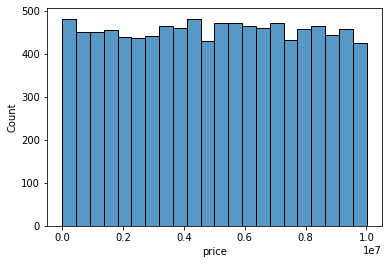

In [36]:
sns.histplot(df['price'])

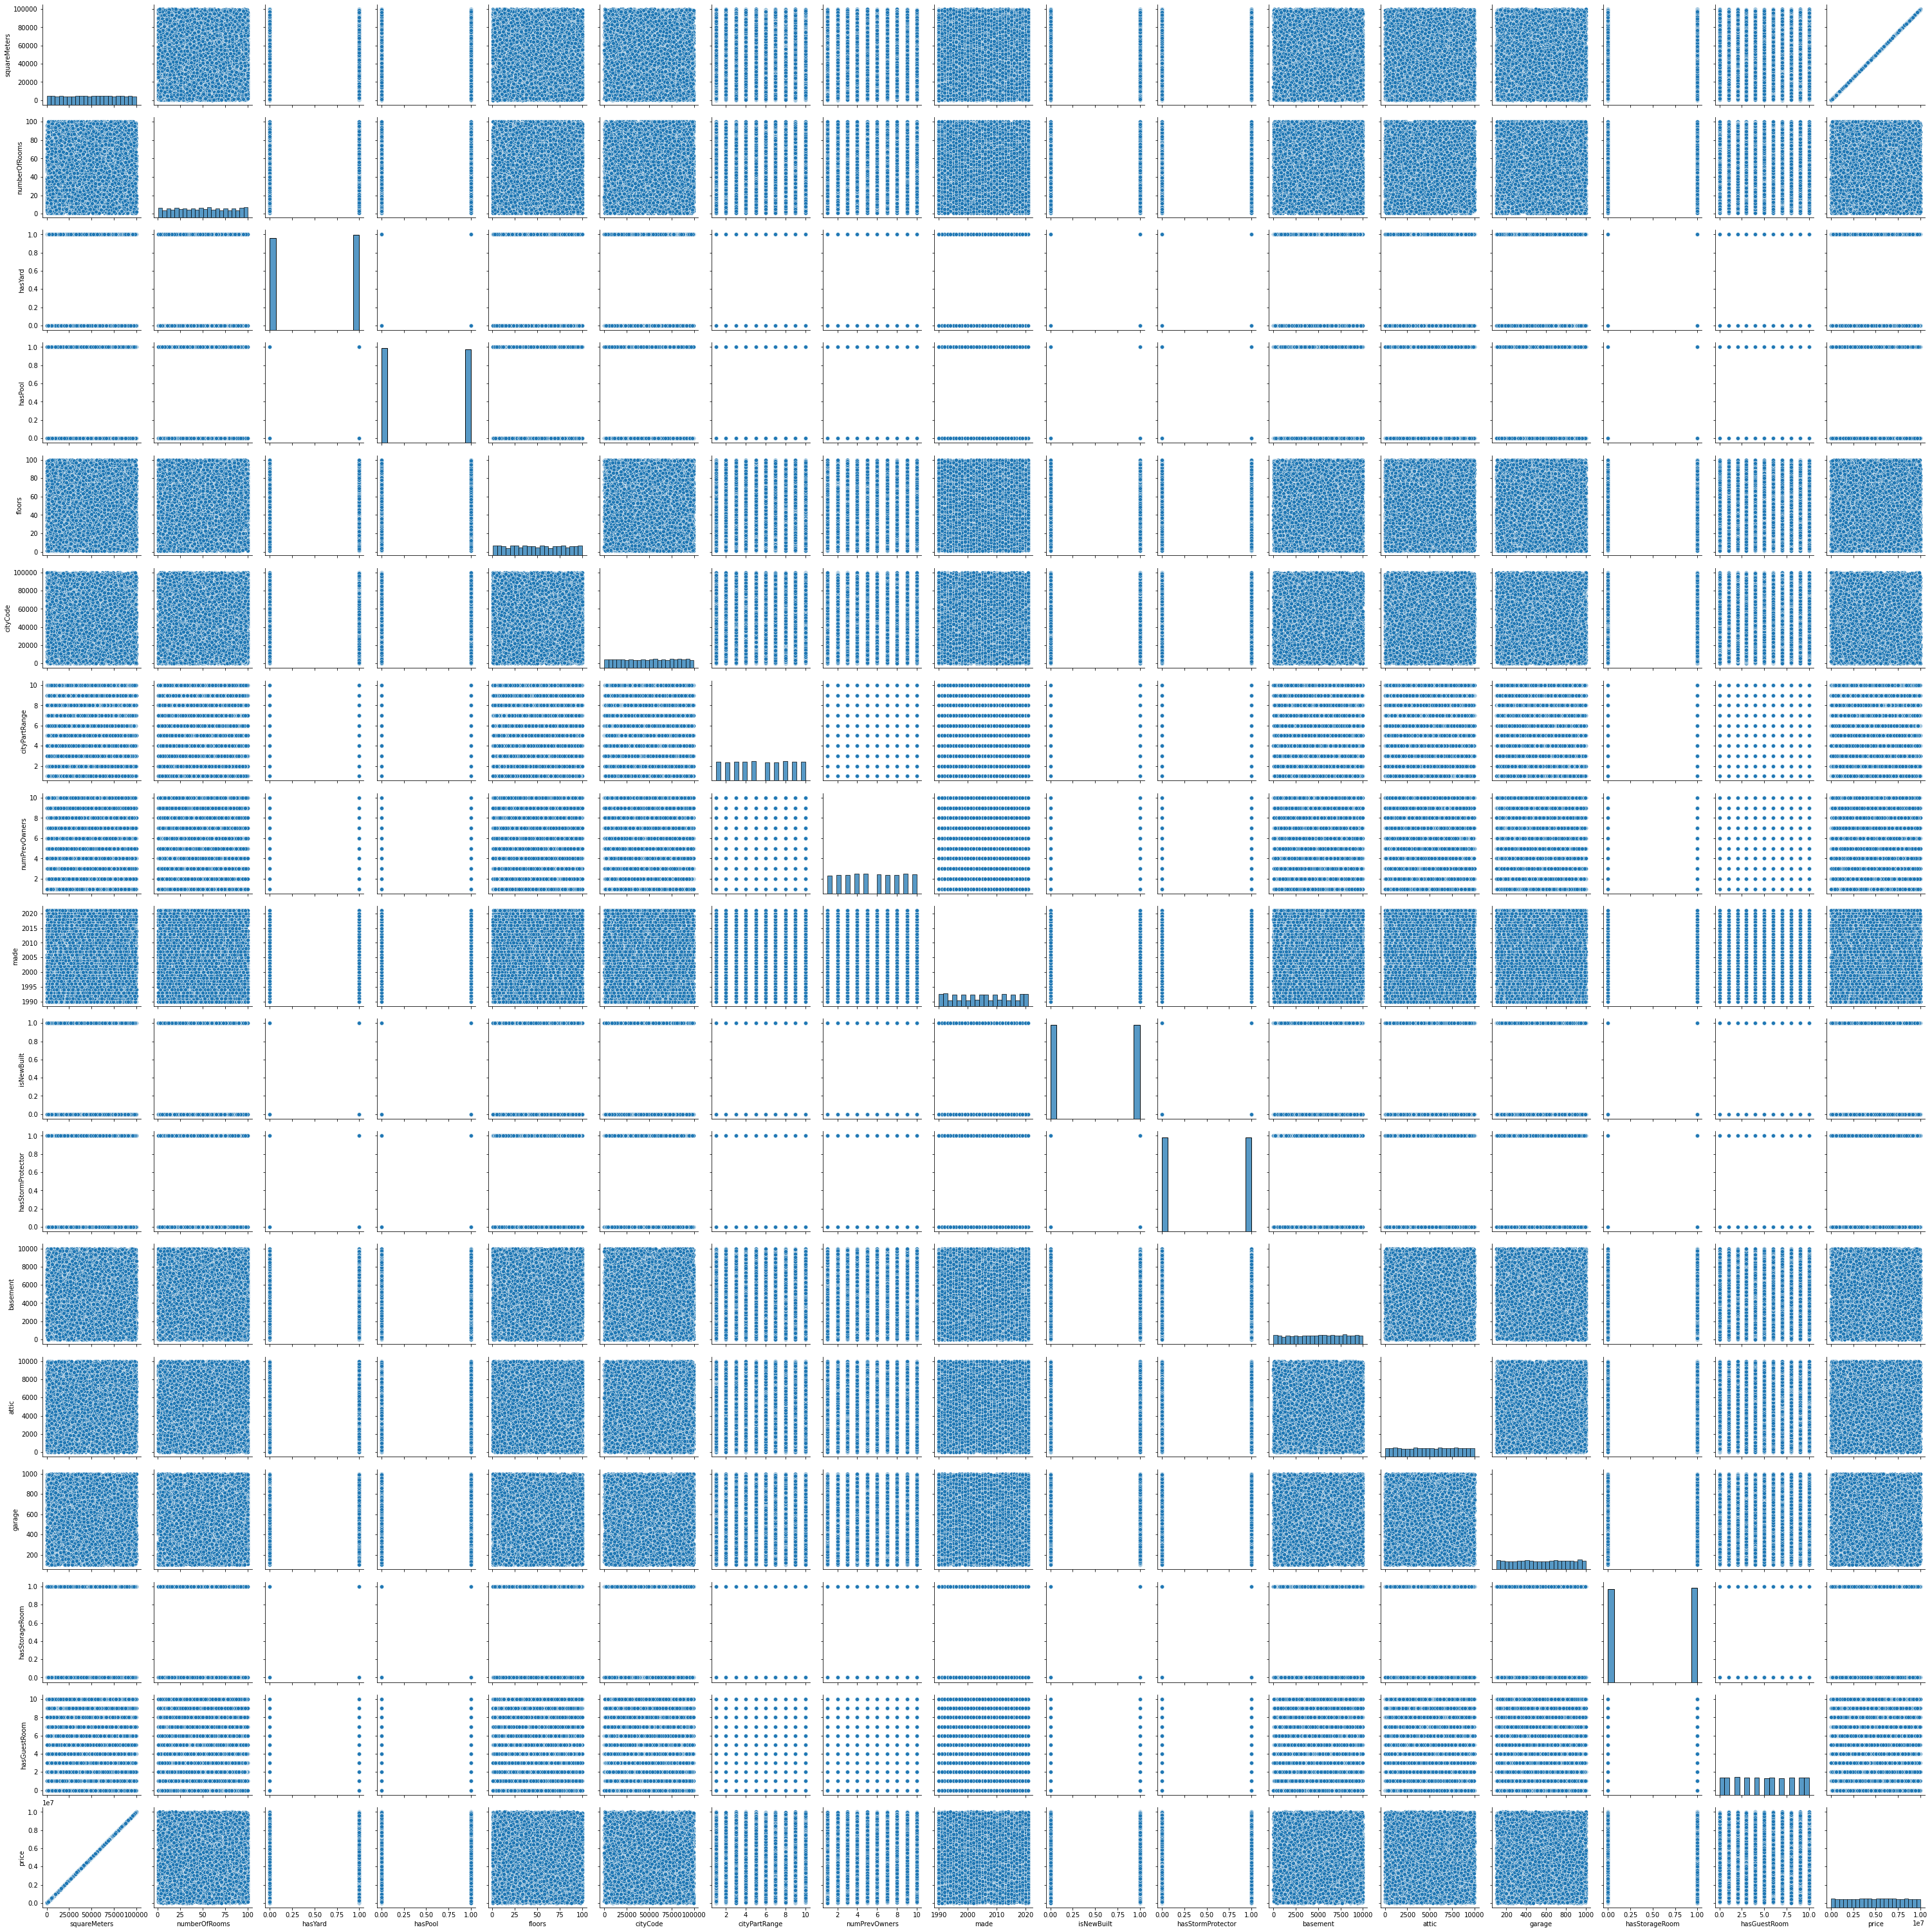

In [37]:
sns.pairplot(df)

<AxesSubplot:xlabel='squareMeters', ylabel='price'>

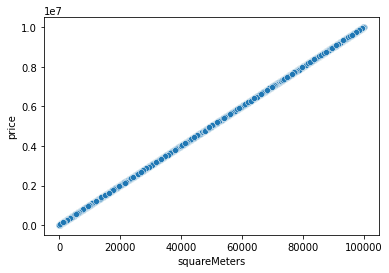

In [38]:
sns.scatterplot(x='squareMeters', y='price', data=df)

In [39]:
# Explore the Data
# Histogram of the Prices
# Are there any outliers?
# Are there any missing values

df.isnull().sum()






# Type your code above this line

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [40]:
# Train Test and Split

# With Tensorflow we really want the values, not the columns

X = df[df.columns[:-1]].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)




# Type your code above this line

In [41]:
# Normalize the data with MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)





# Type your code above this line

MinMaxScaler()

In [42]:
# Apply the scaler to X_train and X_test

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




# Type your code above this line

In [43]:
# Run a Linear Regression from SKLearn so we get a baseline of what to expect

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print('Score', lr.score(X_test, y_test))
print('MAE', mean_absolute_error(y_test, pred_lr))
print('RMSE', np.sqrt(mean_squared_error(y_test, pred_lr)))






# Type your code above this line

Score 0.9999995771430428
MAE 1485.2080395496864
RMSE 1898.778648668358


In [44]:
df['price'].mean()

4993447.52575

In [45]:
# Create the TensorFlow Neural Network
model = Sequential()

# Number of Nodes per layer 16
# Number of Layers 6
# Activation layer 'relu'


model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))



# Add the last output layer with 1 node
model.add(Dense(1, activation='relu'))


# Compile using the 'adam' optimizer with 'mae' for loss

model.compile(optimizer='adam', loss='mae')



# Type your code above this line

In [46]:
# Fit the model
# Use 500 epochs (this will take some time)
# add in the validation data


model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))



# Type your code above this line

Epoch 1/500
219/219 [==============================] - 1s 2ms/step - loss: 4941535.5000 - val_loss: 5056159.5000
Epoch 2/500
219/219 [==============================] - 0s 2ms/step - loss: 3637065.2500 - val_loss: 2440631.0000
Epoch 3/500
219/219 [==============================] - 0s 2ms/step - loss: 2353513.0000 - val_loss: 2380563.7500
Epoch 4/500
219/219 [==============================] - 0s 2ms/step - loss: 2286123.0000 - val_loss: 2300971.7500
Epoch 5/500
219/219 [==============================] - 0s 2ms/step - loss: 2201184.5000 - val_loss: 2202967.5000
Epoch 6/500
219/219 [==============================] - 0s 2ms/step - loss: 2092314.8750 - val_loss: 2083842.2500
Epoch 7/500
219/219 [==============================] - 0s 2ms/step - loss: 1927144.6250 - val_loss: 1855014.6250
Epoch 8/500
219/219 [==============================] - 0s 2ms/step - loss: 1619408.0000 - val_loss: 1387069.0000
Epoch 9/500
219/219 [==============================] - 0s 2ms/step - loss: 765410.7500 - val_los

219/219 [==============================] - 0s 2ms/step - loss: 5060.2051 - val_loss: 5219.0435
Epoch 77/500
219/219 [==============================] - 0s 2ms/step - loss: 3463.5073 - val_loss: 4438.0034
Epoch 78/500
219/219 [==============================] - 0s 2ms/step - loss: 3200.2170 - val_loss: 6186.8101
Epoch 79/500
219/219 [==============================] - 0s 2ms/step - loss: 4085.9392 - val_loss: 2327.1287
Epoch 80/500
219/219 [==============================] - 0s 2ms/step - loss: 3179.0039 - val_loss: 2785.5408
Epoch 81/500
219/219 [==============================] - 0s 2ms/step - loss: 3436.8821 - val_loss: 2204.0081
Epoch 82/500
219/219 [==============================] - 0s 2ms/step - loss: 3734.4175 - val_loss: 2299.9446
Epoch 83/500
219/219 [==============================] - 0s 2ms/step - loss: 3300.7258 - val_loss: 2203.0103
Epoch 84/500
219/219 [==============================] - 0s 2ms/step - loss: 4171.4106 - val_loss: 3378.3337
Epoch 85/500
219/219 [===================

219/219 [==============================] - 0s 2ms/step - loss: 3323.9866 - val_loss: 7626.6436
Epoch 152/500
219/219 [==============================] - 0s 2ms/step - loss: 4240.3403 - val_loss: 7609.6509
Epoch 153/500
219/219 [==============================] - 0s 2ms/step - loss: 4248.6963 - val_loss: 1928.1992
Epoch 154/500
219/219 [==============================] - 0s 2ms/step - loss: 4790.7271 - val_loss: 1864.7695
Epoch 155/500
219/219 [==============================] - 0s 2ms/step - loss: 3240.6777 - val_loss: 4234.6211
Epoch 156/500
219/219 [==============================] - 0s 2ms/step - loss: 3497.1228 - val_loss: 2309.7964
Epoch 157/500
219/219 [==============================] - 0s 2ms/step - loss: 4304.3203 - val_loss: 5548.0537
Epoch 158/500
219/219 [==============================] - 0s 2ms/step - loss: 3268.3081 - val_loss: 4958.6938
Epoch 159/500
219/219 [==============================] - 0s 2ms/step - loss: 3073.0200 - val_loss: 5233.9517
Epoch 160/500
219/219 [==========

219/219 [==============================] - 0s 2ms/step - loss: 3340.0469 - val_loss: 3799.8003
Epoch 227/500
219/219 [==============================] - 0s 2ms/step - loss: 3922.6223 - val_loss: 4166.8481
Epoch 228/500
219/219 [==============================] - 0s 2ms/step - loss: 3400.0469 - val_loss: 2429.6599
Epoch 229/500
219/219 [==============================] - 0s 2ms/step - loss: 4187.8823 - val_loss: 2549.3191
Epoch 230/500
219/219 [==============================] - 0s 2ms/step - loss: 3385.0986 - val_loss: 5483.9858
Epoch 231/500
219/219 [==============================] - 1s 2ms/step - loss: 3539.6726 - val_loss: 2325.6887
Epoch 232/500
219/219 [==============================] - 0s 2ms/step - loss: 3211.5715 - val_loss: 5808.1108
Epoch 233/500
219/219 [==============================] - 0s 2ms/step - loss: 3349.0442 - val_loss: 1992.1720
Epoch 234/500
219/219 [==============================] - 0s 2ms/step - loss: 4281.9604 - val_loss: 1775.8352
Epoch 235/500
219/219 [==========

219/219 [==============================] - 0s 2ms/step - loss: 4231.5127 - val_loss: 2369.6414
Epoch 302/500
219/219 [==============================] - 0s 2ms/step - loss: 3595.4966 - val_loss: 2689.6233
Epoch 303/500
219/219 [==============================] - 0s 2ms/step - loss: 3749.2112 - val_loss: 2392.7922
Epoch 304/500
219/219 [==============================] - 0s 2ms/step - loss: 3179.1875 - val_loss: 2102.5830
Epoch 305/500
219/219 [==============================] - 0s 2ms/step - loss: 4113.2666 - val_loss: 4958.6665
Epoch 306/500
219/219 [==============================] - 0s 2ms/step - loss: 3802.7078 - val_loss: 2243.1763
Epoch 307/500
219/219 [==============================] - 0s 2ms/step - loss: 3451.1899 - val_loss: 3350.5339
Epoch 308/500
219/219 [==============================] - 0s 2ms/step - loss: 3552.8018 - val_loss: 1787.0054
Epoch 309/500
219/219 [==============================] - 0s 2ms/step - loss: 4811.5571 - val_loss: 2022.2323
Epoch 310/500
219/219 [==========

219/219 [==============================] - 0s 2ms/step - loss: 3594.8203 - val_loss: 3845.5991
Epoch 377/500
219/219 [==============================] - 0s 2ms/step - loss: 3672.2231 - val_loss: 2815.9641
Epoch 378/500
219/219 [==============================] - 0s 2ms/step - loss: 3227.6953 - val_loss: 6387.9048
Epoch 379/500
219/219 [==============================] - 0s 2ms/step - loss: 4517.4736 - val_loss: 3169.8118
Epoch 380/500
219/219 [==============================] - 0s 2ms/step - loss: 3388.3342 - val_loss: 8229.5283
Epoch 381/500
219/219 [==============================] - 0s 2ms/step - loss: 4024.0256 - val_loss: 1918.5594
Epoch 382/500
219/219 [==============================] - 0s 2ms/step - loss: 4152.8926 - val_loss: 6244.3999
Epoch 383/500
219/219 [==============================] - 0s 2ms/step - loss: 3590.4631 - val_loss: 2655.8005
Epoch 384/500
219/219 [==============================] - 0s 2ms/step - loss: 3473.7925 - val_loss: 8859.6416
Epoch 385/500
219/219 [==========

219/219 [==============================] - 0s 2ms/step - loss: 3828.9995 - val_loss: 3240.1953
Epoch 452/500
219/219 [==============================] - 0s 2ms/step - loss: 3356.8376 - val_loss: 2080.5750
Epoch 453/500
219/219 [==============================] - 0s 2ms/step - loss: 3476.7336 - val_loss: 5050.8882
Epoch 454/500
219/219 [==============================] - 0s 2ms/step - loss: 4689.8511 - val_loss: 5680.8892
Epoch 455/500
219/219 [==============================] - 0s 2ms/step - loss: 3703.2366 - val_loss: 6533.6455
Epoch 456/500
219/219 [==============================] - 0s 2ms/step - loss: 4023.0071 - val_loss: 2030.2235
Epoch 457/500
219/219 [==============================] - 0s 2ms/step - loss: 3028.9631 - val_loss: 3609.7153
Epoch 458/500
219/219 [==============================] - 0s 2ms/step - loss: 3356.8303 - val_loss: 2420.3521
Epoch 459/500
219/219 [==============================] - 0s 2ms/step - loss: 3062.6348 - val_loss: 3219.3940
Epoch 460/500
219/219 [==========

In [47]:
# Create a losses dataframe to compare our model with the actual results


losses = pd.DataFrame(model.history.history)



# Type your code above this line

In [48]:
losses

loss      val_loss
0    4.941536e+06  5.056160e+06
1    3.637065e+06  2.440631e+06
2    2.353513e+06  2.380564e+06
3    2.286123e+06  2.300972e+06
4    2.201184e+06  2.202968e+06
..            ...           ...
495  3.219817e+03  5.880606e+03
496  3.632074e+03  8.240293e+03
497  4.427170e+03  2.879063e+03
498  3.994783e+03  4.842641e+03
499  3.161047e+03  4.110168e+03

[500 rows x 2 columns]

<AxesSubplot:>

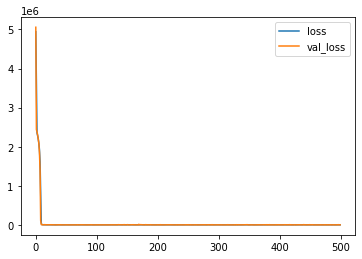

In [49]:
# Plot the losses against the validation data


losses.plot()


# Type your code above this line

In [52]:
# Run Predictions on the model against the X_test dataset


pred_tf = model.predict(X_test)



# Type your code above this line

94/94 [==============================] - 0s 819us/step


In [53]:
pred_tf

array([[7968453.],
       [3719715.],
       [8557781.],
       ...,
       [5228685.],
       [5866075.],
       [4831931.]], dtype=float32)

In [54]:
# Calculate the explained_variance_score, mean_absolute_error and root mean squared error
# How does this compare to SKLearns Linear Regression Model?


print('Score', explained_variance_score(y_test, pred_tf))
print('MAE', mean_absolute_error(y_test, pred_tf))
print('RMSE', np.sqrt(mean_squared_error(y_test, pred_tf)))


# Type your code above this line

Score 0.9999988922160841
MAE 4110.162141145836
RMSE 5011.241888175087


In [64]:
# Create an array from the 0th element (drop the price column) in the dataframe and run a prediction against it
# Tip: Scale the data before running the prediction

test_pred = model.predict(scaler.transform(df.loc[0].drop('price').values.reshape(-1,16)))



# Type your code above this line

1/1 [==============================] - 0s 21ms/step


In [65]:
# Does the prediction value match the actual value?

df.loc[0]['price'] - test_pred


# Type your code above this line

array([[-5390.]], dtype=float32)